In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving household_power_consumption.txt to household_power_consumption.txt


In [ ]:
dtype_dict = {
    'Global_active_power': 'float64',
    'Global_reactive_power': 'float64',
    'Voltage': 'float64',
    'Global_intensity': 'float64',
    'Sub_metering_1': 'float64',
    'Sub_metering_2': 'float64',
    'Sub_metering_3': 'float64'
}
df1=pd.read_csv("household_power_consumption.txt",sep=';',dtype=dtype_dict,na_values='?')
df1['Datetime']=pd.to_datetime(df1['Date'] + ' ' + df1['Time'], format='%d/%m/%Y %H:%M:%S')
df1.drop(columns=['Date', 'Time'], inplace=True)
df1.dropna(subset=['Datetime'], inplace=True)
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [ ]:
df1.set_index('Datetime', inplace=True)
daily_data= df1['Global_active_power'].resample('D').sum()
daily_data= daily_data.to_frame(name='daily_power')
scaler=StandardScaler()
daily_data=scaler.fit_transform(daily_data)
daily_data

array([[-0.55447782],
       [ 2.98035277],
       [ 1.05737981],
       ...,
       [ 0.39688847],
       [-0.19474017],
       [-0.10246734]])

In [ ]:
def create_sequences(data, window_size):
    sequences=[]
    labels=[]
    for i in range(len(data)-window_size):
        seq= data[i:i+window_size]
        label= data[i+window_size]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [ ]:
window_size= 7
X,Y =create_sequences(daily_data, window_size)
X=X.reshape((X.shape[0], X.shape[1], 1))
X

array([[[-0.55447782],
        [ 2.98035277],
        [ 1.05737981],
        ...,
        [ 1.09290501],
        [ 0.26785559],
        [ 1.28022178]],

       [[ 2.98035277],
        [ 1.05737981],
        [ 0.1861324 ],
        ...,
        [ 0.26785559],
        [ 1.28022178],
        [ 5.22142231]],

       [[ 1.05737981],
        [ 0.1861324 ],
        [ 1.09290501],
        ...,
        [ 1.28022178],
        [ 5.22142231],
        [ 1.61838372]],

       ...,

       [[ 0.04974556],
        [ 0.16337695],
        [ 0.03089559],
        ...,
        [-1.05403133],
        [ 0.79438441],
        [ 0.04245967]],

       [[ 0.16337695],
        [ 0.03089559],
        [ 1.04632781],
        ...,
        [ 0.79438441],
        [ 0.04245967],
        [ 0.39688847]],

       [[ 0.03089559],
        [ 1.04632781],
        [-1.05403133],
        ...,
        [ 0.04245967],
        [ 0.39688847],
        [-0.19474017]]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1314)
model = Sequential([LSTM(100, activation='relu', input_shape=(X.shape[1], 1)),Dense(1)])
model.compile(optimizer='adamW', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.9681 - val_loss: 0.7243
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6440 - val_loss: 0.6732
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5574 - val_loss: 0.6142
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5338 - val_loss: 0.6234
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5007 - val_loss: 0.6112
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5007 - val_loss: 0.6014
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5485 - val_loss: 0.5888
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5115 - val_loss: 0.5946
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5222 - val_loss: 0.5834
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4886 - val_loss: 0.6244
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5559 - val_loss: 0.5839
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


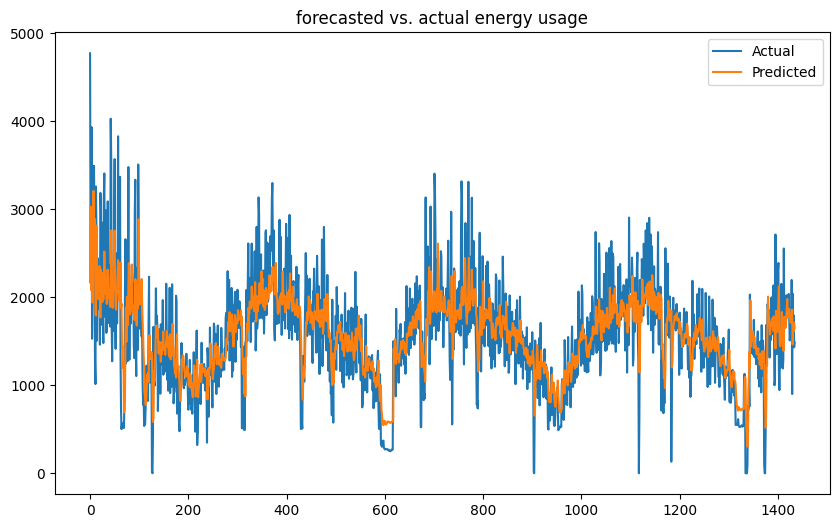

In [12]:
predictions=model.predict(X)
y_true=scaler.inverse_transform(Y.reshape(-1, 1))
y_pred=scaler.inverse_transform(predictions)
plt.figure(figsize=(10,6))
plt.plot(y_true,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.title('forecasted vs. actual energy usage')
plt.show()

In [ ]:
train_loss=model.evaluate(x_train, y_train, verbose=0)
test_loss=model.evaluate(x_test, y_test, verbose=0)
print(f"Train  Loss: {train_loss}")
print(f"Test Loss: {test_loss}")
y_pred=model.predict(x_test)
y_true=y_test
test_mae=mean_absolute_error(y_true,y_pred)
print(f" MAE: {test_mae}")
test_rmse=root_mean_squared_error(y_true,y_pred)
print(f" RMSE: {test_rmse}")